In [1]:
from preprocessing import preprocess_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df1 = pd.read_csv('data/Spotify_train_dataset.csv')

features_columns = ['danceability', 'energy', 'key', 'loudness', 'mode',
        'speechiness', 'acousticness', 'instrumentalness', 'liveness',
        'valence', 'tempo', 'duration_ms', 'time_signature']
label = ['genre']
df1, df1_labels = preprocess_data(df1, features_columns, label, z_score=True, standardize=True)

------------------------------------------
            Preprocessing data            
------------------------------------------
Get dataset
Shape of the data to process : (31728, 20)
------------------------------------------
Extract labels ...
Encode labels ...
Extract inputs ...
Remove outliers with zscore ...
Center and reduce inputs ...
------------------------------------------
Data shape after preprocessing : (30878, 13)
Labels shape : (30878,)
Return dataset(s) ...
Preprocessing finished
------------------------------------------


   danceability    energy       key  loudness      mode  speechiness  \
0     -1.235105  0.228703  0.168868  1.073662  0.909154    -0.410316   
1     -0.149459 -0.647270 -0.104132 -2.806493 -1.099924     2.405405   
2      0.351609  0.720379  0.441868  0.169510  0.909154    -0.215812   
3      0.820557 -1.483683 -1.469134 -1.867580  0.909154    -0.740055   
4     -1.549879 -0.522938  1.533870 -0.257204 -1.099924    -0.343534   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0     -0.564894          1.579096 -0.598304 -1.036105 -0.201161    -0.174022   
1      0.961796          1.546871 -0.592411 -0.775609 -0.813106     1.091734   
2     -0.468921          1.552242 -0.639557  0.906937 -0.811085     2.478069   
3     -0.562232         -0.773335 -0.756244 -1.091620 -1.147724    -0.196102   
4      1.180226         -0.773274  0.639283 -0.015474  0.963121    -0.703465   

   time_signature  
0        0.079037  
1        0.079037  
2        0.079037  
3     

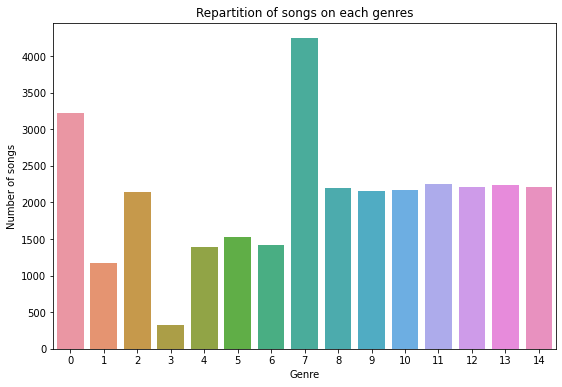

In [66]:
print(df1.head())
print(df1.info())

In [ ]:
#Get repartition of song on each genres
index = [i for i in range(15)]
genre_repartition = df1_labels["genre"].value_counts().sort_index().to_numpy()

f, ax = plt.subplots(figsize=(9, 6))
bar = sns.barplot(x=index, y=genre_repartition)
plt.title("Repartition of songs on each genres")
plt.xlabel("Genre")
plt.ylabel("Number of songs")
plt.show()


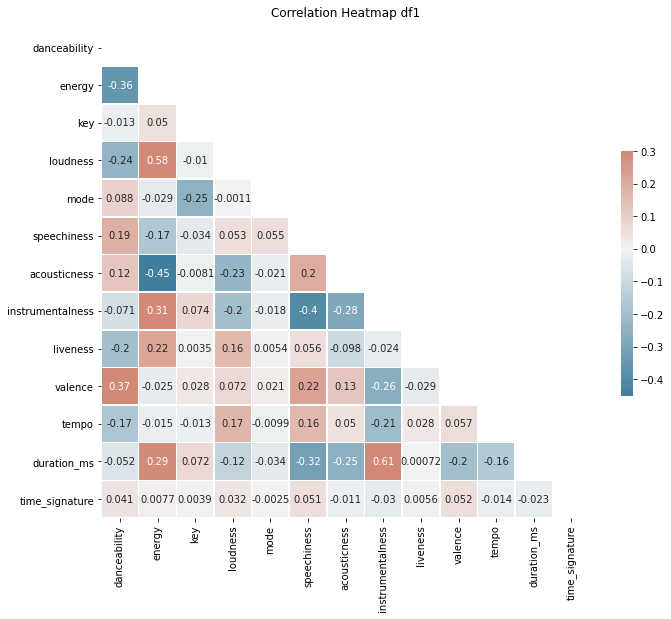

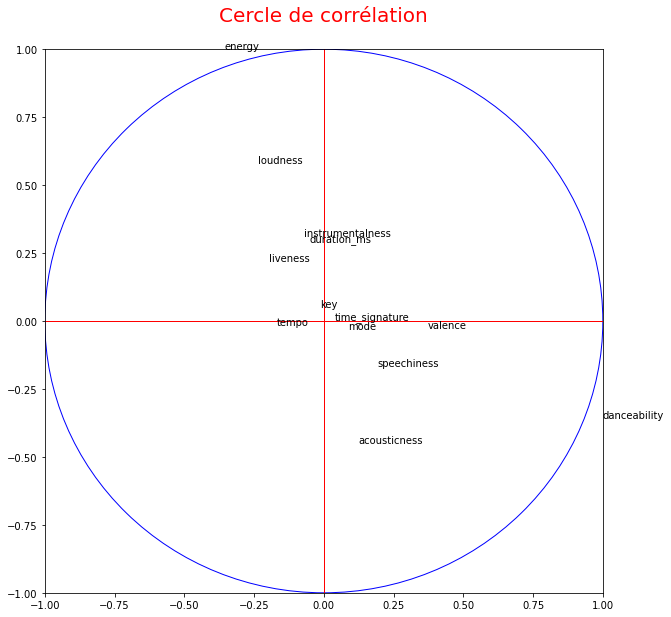

In [4]:
corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
heatmap.set_title('Correlation Heatmap df1', fontdict={'fontsize':12}, pad=12);
plt.show()

#Cercle de correlation
corvar = pd.DataFrame.to_numpy(corr)
fig, axes = plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
X = df1
for j in range(13):
   plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
plt.plot([-1,1],[0,0],color='red',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='red',linestyle='-',linewidth=1)
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)
plt.title('Cercle de corrélation\n', fontsize=20, color='red')
plt.show()

In [5]:
# pairplot = sns.pairplot(df1)
# plt.show()